In [1]:
## Import libraries

from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics
from random import seed

import tensorflow as tf 
from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

##### This is an Image classification exercise. We will play with an expired Kaggle competition, https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview.

## Running a VGG16 Model

In [8]:
import tensorflow as tf
from tensorflow import keras
import sys
import numpy as np
import os
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile

from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import shutil

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import files
files.upload()

{}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 799M/814M [00:05<00:00, 133MB/s]
100% 814M/814M [00:05<00:00, 142MB/s]


In [14]:
# Create data directory and unzip training and testing data
!mkdir data && unzip dogs-vs-cats-redux-kernels-edition.zip -d data/

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.zip           
  inflating: data/train.zip          


In [16]:
!unzip data/test.zip -d data/
!unzip data/train.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train/dog.5499.jpg  
  inflating: data/train/dog.55.jpg   
  inflating: data/train/dog.550.jpg  
  inflating: data/train/dog.5500.jpg  
  inflating: data/train/dog.5501.jpg  
  inflating: data/train/dog.5502.jpg  
  inflating: data/train/dog.5503.jpg  
  inflating: data/train/dog.5504.jpg  
  inflating: data/train/dog.5505.jpg  
  inflating: data/train/dog.5506.jpg  
  inflating: data/train/dog.5507.jpg  
  inflating: data/train/dog.5508.jpg  
  inflating: data/train/dog.5509.jpg  
  inflating: data/train/dog.551.jpg  
  inflating: data/train/dog.5510.jpg  
  inflating: data/train/dog.5511.jpg  
  inflating: data/train/dog.5512.jpg  
  inflating: data/train/dog.5513.jpg  
  inflating: data/train/dog.5514.jpg  
  inflating: data/train/dog.5515.jpg  
  inflating: data/train/dog.5516.jpg  
  inflating: data/train/dog.5517.jpg  
  inflating: data/train/dog.5518.jpg  
  inflating: data/train/dog.5519.jpg  
  inflating: dat

### Pre process photos: Add labels to photos, 0 is for cats and 1 is for dogs

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

import os
import pandas as pd

## Plotting some sample images
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2




In [17]:
### Unzip the files and store them in directories to be used later in the directory based calls for the VG16 neural network model

In [18]:
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['data/train/', 'data/test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
    eed random number generator
seed(1)
# ratio of pictures to use for validation: 35% of the pictures will be used for validation purpose
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'data/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'data/train/'
    if random() < val_ratio:
        dst_dir = 'data/test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [1]:
# DataFrame to visualize dataset
PATH = 'data/'
filenames = os.listdir(f'{PATH}train')
labels = []
for name in filenames:
    label = name.split('.')[0]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

df.head()

,filename,label
0,dog.8107.jpg,1
1,cat.8743.jpg,0
2,dog.1429.jpg,1
3,cat.2049.jpg,0
4,cat.7498.jpg,0


In [2]:
## checking the distribution of cats and dogs image in the training data
df.pivot_table(index='label', aggfunc=len).sort_values('filename', ascending=False)

,filename
label,
0,12500
1,12500


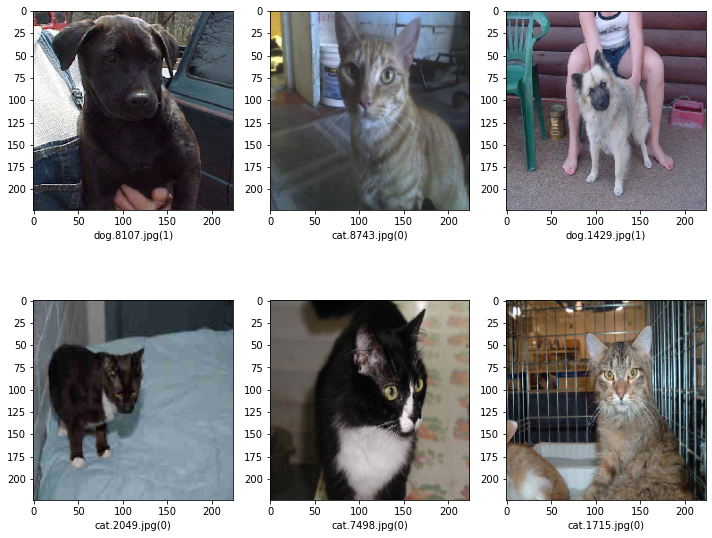

In [3]:
# See sample images to check if the dataset has been properly loaded and labelled
sample_train = df.head(6)
sample_train.head()
plt.figure(figsize=(10, 24))
for index, row in sample_train.iterrows():
    filename = row['filename']
    category = row['label']
    img = load_img(PATH+'/train/'+filename, target_size=[224,224])
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

## Build the model with Regularizarion

In [4]:
# vgg16 model used for transfer learning on the dogs and cats dataset
def define_model_train_vg16_regularization():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers[:-4]:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def run_test_harness_reg():
    # define model
    model = define_model_train_vg16_regularization()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/data/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/data/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=1)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    return history

In [6]:
history = run_test_harness_reg()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/5
293/293 [==============================] - 261s 855ms/step - loss: 2.7640 - accuracy: 0.9098 - val_loss: 2.4473 - val_accuracy: 0.9740
Epoch 2/5
293/293 [==============================] - 239s 817ms/step - loss: 2.2731 - accuracy: 0.9786 - val_loss: 2.1484 - val_accuracy: 0.9787
Epoch 3/5
293/293 [==============================] - 238s 813ms/step - loss: 2.0004 - accuracy: 0.9889 - val_loss: 1.9128 - val_accuracy: 0.9832
Epoch 4/5
293/293 [==============================] - 242s 827ms/step - loss: 1.7653 - accuracy: 0.9956 - val_loss: 1.7154 - val_accuracy: 0.9819
Epoch 5/5
293/293 [==============================] - 238s 812ms/step - loss: 1.5636 - accuracy: 0.9990 - val_loss: 1.5409 - val_accuracy: 0.9824
> 98.239


In [17]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')


##### Viewing the model results

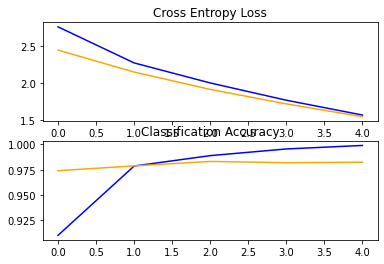

In [18]:
summarize_diagnostics(history)

In [14]:
history

In [19]:
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
dataset_home = 'finalize_dogs_vs_cats/'
# create label subdirectories
labeldirs = ['dogs/', 'cats/']
for labldir in labeldirs:
    newdir = dataset_home + labldir
    makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = 'data/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    if file.startswith('cat'):
        dst = dataset_home + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + 'dogs/'  + file
        copyfile(src, dst)

In [20]:
model = define_model_train_vg16_regularization()
# create data generator
datagen = ImageDataGenerator(featurewise_center=True)
# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]
# prepare iterator
train_it = datagen.flow_from_directory('finalize_dogs_vs_cats/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# fit model

Found 25000 images belonging to 2 classes.


In [21]:
model.save('final_model_reg.h5')

In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

def run_example(filename):
    # load the image
    img = load_image(filename)
    # predict the class
    prediction = model.predict(img)
    return prediction

In [24]:
submission = pd.read_csv("sample_submission.csv")

In [25]:
submission.head()

,id,label
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5


In [26]:
model = load_model('final_model_reg.h5')

In [27]:
submission['label'] = submission['id'].apply(lambda data: run_example('data/test/'+str(data)+'.jpg')[0][0] )
submission.to_csv("MSBASection1AkshitaSrivastava.csv")

In [2]:
#### DESCRIPTIONS:

##### In the above steps, I have implemented a pre trained VG 16 model and used regularization with dropout
##### 'SGD' has been used as the optimizer and 20 epochs have been used.
##### This is because 'Adam' was giving higher loss on teh validation data, but SGD was performing equally 
##### well both for train and validation data

##### Before building the model, Image Data Generator was used to resize the images and store the images 
##### after labelling in specific directories, This was done because VG16 is using datagen function to train
##### the files from specific directories